In [71]:
using Images

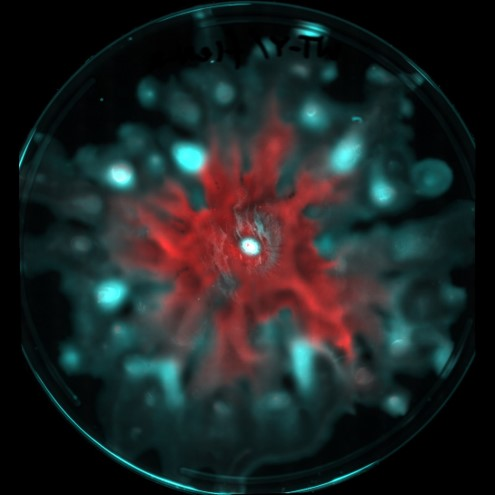

In [72]:
img = load("wt-hy-exp-1.jpg")

In [73]:
lside = size(img)[1] #assume image is square. 

495

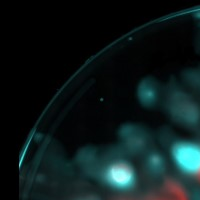

In [74]:
#get part of image!
img[1:200, 1:200]  

In [75]:
imcent = lside ÷ 2;
img[imcent, imcent]

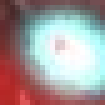

In [76]:
img[imcent-10:imcent+10, imcent-10:imcent+10] #validate my assumption that the center is indeed, centered.

In [77]:
maxr = lside ÷ 2; #ignore anything further than this, ie far corners. 

In [80]:
data_dict = Dict{Int, Vector{N0f8}}() #map radius to a (variable-length) vector of all the intensities. 
#for every pixel in the image 
for ro in 1:lside
    for co in 1:lside
        #compute its radius (round to integer for ease of categorizing! 1 pixel = 1 unit.)
        radius = Int(round(sqrt((ro - imcent)^2 + (co - imcent)^2)));
        if radius > maxr
            continue
        end
        #compute its intensity for WT (red-ish in color, for simplicity assume equivalent to red channel)   
        pxl = img[ro, co];
        intensity = red(pxl);
        if !haskey(data_dict, radius)
            data_dict[radius] = N0f8[];
        end
        push!(data_dict[radius], intensity); 
    end
end

In [99]:
#finally, get all averages by radius, for plotting
rdata = Any[]; intensedata = Any[];
for rad in keys(data_dict)
    push!(rdata, rad);
    avg_intensity = sum(data_dict[rad]) / length(data_dict[rad]); #could also use stats package
    push!(intensedata, avg_intensity);
end

In [93]:
using Plots

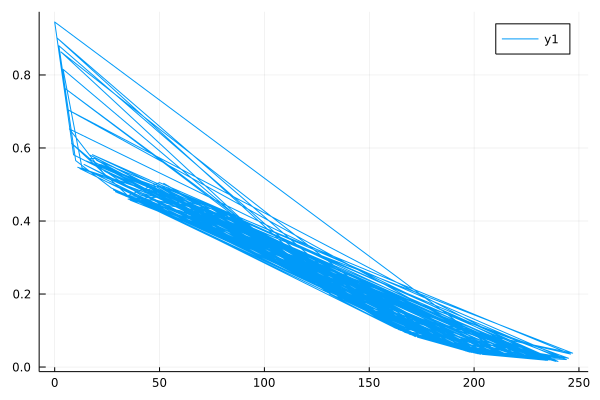

In [108]:
plot(rdata, intensedata)

In [112]:
#try again, this time sorted
rdata = Any[]; intensedata = Any[];
for rad in sort(collect(keys(data_dict))) #sort!!
    push!(rdata, rad);
    avg_intensity = sum(data_dict[rad]) / length(data_dict[rad]); #could also use stats package
    push!(intensedata, avg_intensity);
end

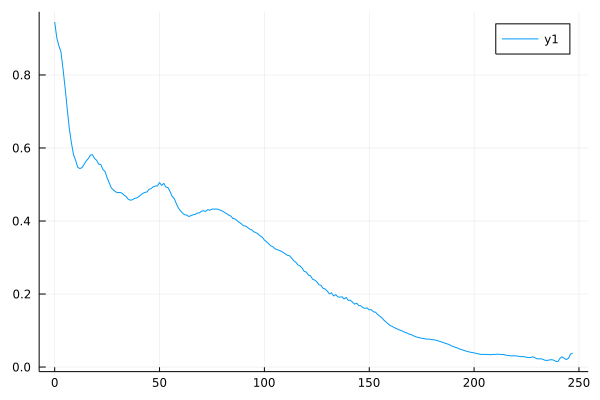

In [113]:
plot(rdata, intensedata)